In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import re
import datetime
import tqdm

import seaborn as sns

import tensorflow as tf
import keras.backend.tensorflow_backend as ktf
from keras.models import *
from keras.layers import *
from keras.layers.core import Lambda
from keras import backend as K
from keras.callbacks import EarlyStopping, TensorBoard

%matplotlib inline
from numpy import concatenate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import keras
from time import time
#from tensorflow.python.keras.callbacks import TensorBoard


Using TensorFlow backend.


In [2]:
dataset_3_further_interpolated = pd.read_csv("H:\Celestini 2019\Dataset\punjabibagh-60\dataset_3_further_interpolated.csv")   
#dataset = dataset_3_further_interpolated_with_indexes.set_index(["To Date"])
#dataset.index = pd.to_datetime(dataset_3_further_interpolated_with_indexes["To Date"], dayfirst= True )
#dataset.head()
dataset_3_further_interpolated = dataset_3_further_interpolated.drop("Unnamed: 0", axis = 1)
dataset_3_further_interpolated = dataset_3_further_interpolated.loc[:30362,:]
dataset_3_further_interpolated = dataset_3_further_interpolated.set_index("timestamp")
dataset_3_further_interpolated.index = pd.to_datetime(dataset_3_further_interpolated.index, dayfirst=True)
dataset_3_further_interpolated.head()

,AT,BP,CO,NO,NO2,Ozone,PM10,PM2.5,RH,SO2,...,mt,yr,H,weekday,weekday_hour,m_weekday_CO,m_weekday_NO2,m_weekday_PM10,m_weekday_PM2.5,m_weekday_SO2
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 01:00:00,10.22,738.00,0.34,72.91,99.96,11.85,528.33,334.0,67.33,21.33,...,1,2016,1,4,4 1,1.936279,96.906300,317.359128,130.223726,22.395368
2016-01-01 02:00:00,9.37,738.00,0.47,94.07,86.74,11.23,528.67,354.0,70.83,26.85,...,1,2016,2,4,4 2,1.697401,92.327867,304.253337,129.976150,21.597573
2016-01-01 03:00:00,9.22,738.00,0.58,82.03,87.12,12.07,663.40,354.0,71.92,26.84,...,1,2016,3,4,4 3,1.555527,82.448716,291.977495,124.162454,21.907678
2016-01-01 04:00:00,8.96,738.00,1.03,48.89,84.37,11.44,619.67,354.0,72.33,26.66,...,1,2016,4,4,4 4,1.464667,79.760979,287.085087,121.936639,23.044557
2016-01-01 05:00:00,8.47,738.33,1.25,57.62,75.45,13.43,555.33,350.0,73.33,16.59,...,1,2016,5,4,4 5,1.440171,75.460238,279.192906,123.575242,21.587912


In [3]:
dataset_2016 = dataset_3_further_interpolated.head(8783)
dataset_2017 = dataset_3_further_interpolated.iloc[8784: 17543, :]
dataset_2018 = dataset_3_further_interpolated.iloc[17544:26314, :]
dataset_2019 = dataset_3_further_interpolated.iloc[26315:, :]

In [4]:
jan_2016 = dataset_2016.loc[(dataset_2016.index.month == 1)]
feb_2016 = dataset_2016.loc[(dataset_2016.index.month == 2)]
mar_2016 = dataset_2016.loc[(dataset_2016.index.month == 3)]
apr_2016 = dataset_2016.loc[(dataset_2016.index.month == 4)]
may_2016 = dataset_2016.loc[(dataset_2016.index.month == 5)]
june_2016 = dataset_2016.loc[(dataset_2016.index.month ==6)]
july_2016 = dataset_2016.loc[(dataset_2016.index.month ==7)]
aug_2016 = dataset_2016.loc[(dataset_2016.index.month == 8)]
sept_2016 = dataset_2016.loc[(dataset_2016.index.month ==9)]
oct_2016 = dataset_2016.loc[(dataset_2016.index.month == 10)]
nov_2016 = dataset_2016.loc[(dataset_2016.index.month == 11)]
dec_2016 = dataset_2016.loc[(dataset_2016.index.month == 12)]

grishma_2016 = pd.concat([may_2016, june_2016])
vasant_2016 = pd.concat([mar_2016, apr_2016])
varsha_2016 = pd.concat([june_2016, july_2016])
sharad_2016 = pd.concat([sept_2016, oct_2016])
hemant_2016 = pd.concat([nov_2016, dec_2016])
shishir_2016 =  pd.concat([jan_2016, feb_2016])

jan_2017 = dataset_2017.loc[(dataset_2017.index.month == 1)]
feb_2017 = dataset_2017.loc[(dataset_2017.index.month == 2)]
mar_2017 = dataset_2017.loc[(dataset_2017.index.month == 3)]
apr_2017 = dataset_2017.loc[(dataset_2017.index.month == 4)]
may_2017 = dataset_2017.loc[(dataset_2017.index.month == 5)]
june_2017 = dataset_2017.loc[(dataset_2017.index.month ==6)]
july_2017 = dataset_2017.loc[(dataset_2017.index.month ==7)]
aug_2017 = dataset_2017.loc[(dataset_2017.index.month == 8)]
sept_2017 = dataset_2017.loc[(dataset_2017.index.month ==9)]
oct_2017 = dataset_2017.loc[(dataset_2017.index.month == 10)]
nov_2017 = dataset_2017.loc[(dataset_2017.index.month == 11)]
dec_2017 = dataset_2017.loc[(dataset_2017.index.month == 12)]

grishma_2017 = pd.concat([may_2017, june_2017])
vasant_2017 = pd.concat([mar_2017, apr_2017])
varsha_2017 = pd.concat([june_2017, july_2017])
sharad_2017 = pd.concat([sept_2017, oct_2017])
hemant_2017 = pd.concat([nov_2017, dec_2017])
shishir_2017 =  pd.concat([jan_2017, feb_2017])

jan_2018 = dataset_2018.loc[(dataset_2018.index.month == 1)]
feb_2018 = dataset_2018.loc[(dataset_2018.index.month == 2)]
mar_2018 = dataset_2018.loc[(dataset_2018.index.month == 3)]
apr_2018 = dataset_2018.loc[(dataset_2018.index.month == 4)]
may_2018 = dataset_2018.loc[(dataset_2018.index.month == 5)]
june_2018 = dataset_2018.loc[(dataset_2018.index.month ==6)]
july_2018 = dataset_2018.loc[(dataset_2018.index.month ==7)]
aug_2018 = dataset_2018.loc[(dataset_2018.index.month == 8)]
sept_2018 = dataset_2018.loc[(dataset_2018.index.month ==9)]
oct_2018 = dataset_2018.loc[(dataset_2018.index.month == 10)]
nov_2018 = dataset_2018.loc[(dataset_2018.index.month == 11)]
dec_2018 = dataset_2018.loc[(dataset_2018.index.month == 12)]

grishma_2018 = pd.concat([may_2018, june_2018])
vasant_2018 = pd.concat([mar_2018, apr_2018])
varsha_2018 = pd.concat([june_2018, july_2018])
sharad_2018 = pd.concat([sept_2018, oct_2018])
hemant_2018 = pd.concat([nov_2018, dec_2018])
shishir_2018 =  pd.concat([jan_2018, feb_2018])

jan_2019 = dataset_2019.loc[(dataset_2019.index.month == 1)]
feb_2019 = dataset_2019.loc[(dataset_2019.index.month == 2)]
mar_2019 = dataset_2019.loc[(dataset_2019.index.month == 3)]
apr_2019 = dataset_2019.loc[(dataset_2019.index.month == 4)]
may_2019 = dataset_2019.loc[(dataset_2019.index.month == 5)]
june_2019 = dataset_2019.loc[(dataset_2019.index.month ==6)]


grishma_2019 = pd.concat([may_2019, june_2019])
vasant_2019 = pd.concat([mar_2019, apr_2019])
shishir_2019 =  pd.concat([jan_2019, feb_2019])

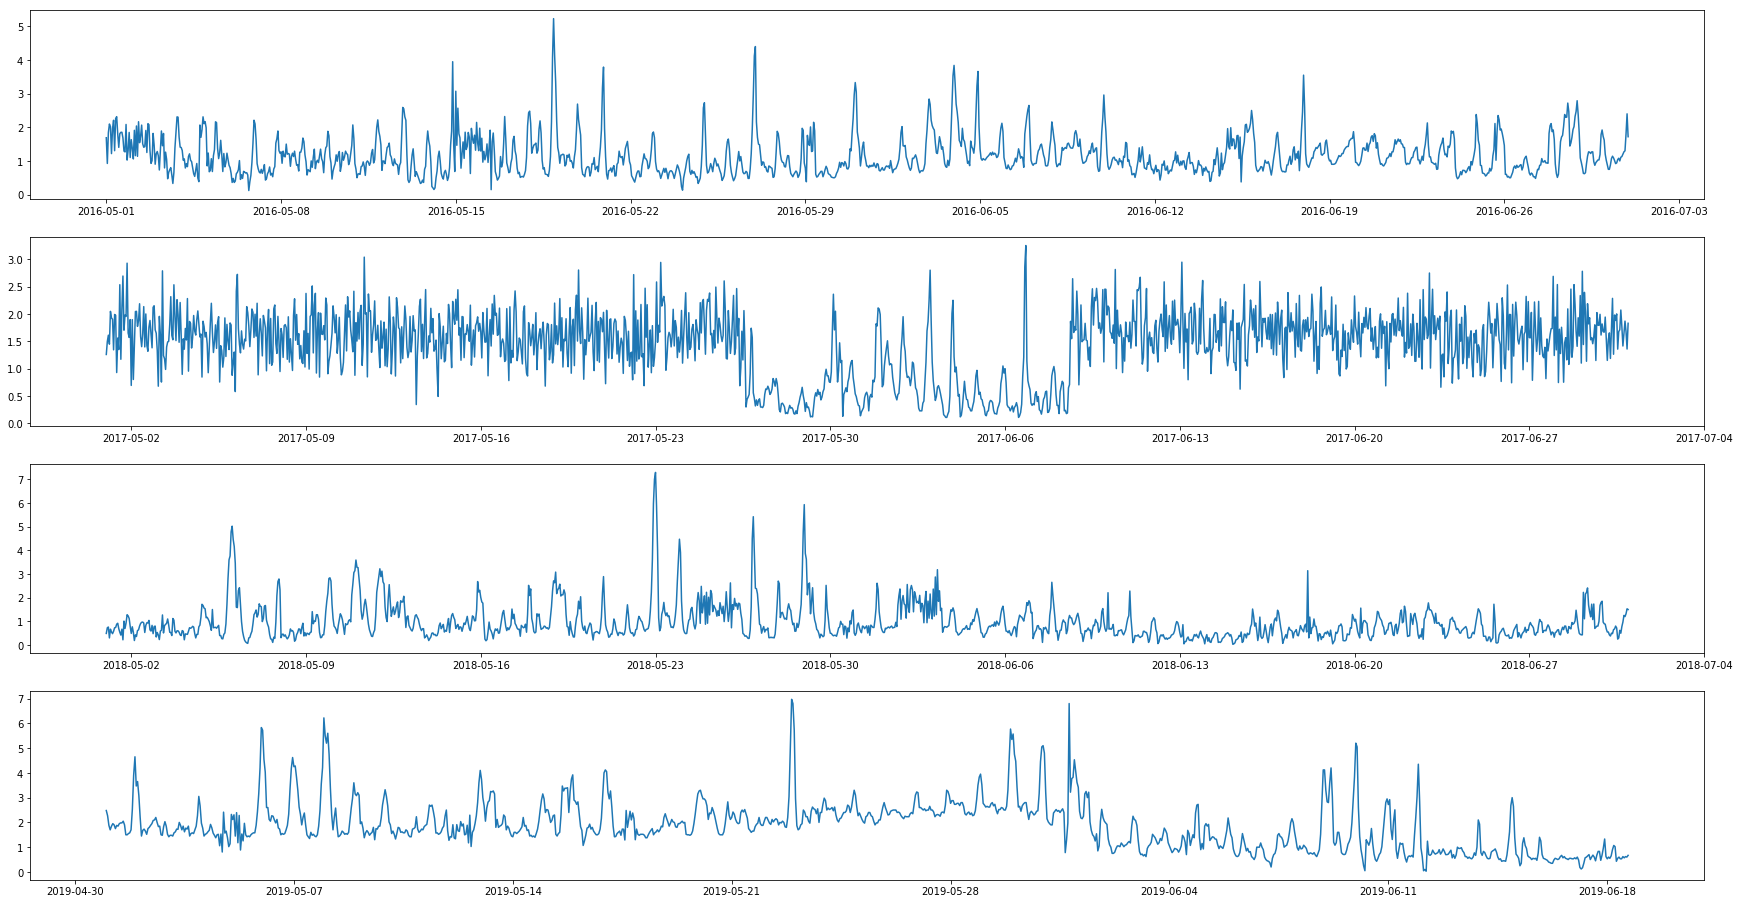

In [5]:
fig, ax = plt.subplots(4, figsize = (30,16))
ax[0].plot(grishma_2016["CO"]) 
ax[1].plot(grishma_2017["CO"])
ax[2].plot(grishma_2018["CO"])
ax[3].plot(grishma_2019["CO"])

In [26]:
values_grishma_2019 = grishma_2019[['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS']].values
values_grishma_2019 = values_grishma_2019.astype('float32')
###_________________________________________________________________

values_shishir_2019 = shishir_2019[['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS']].values
values_shishir_2019 = values_shishir_2019.astype('float32')
###_________________________________________________________________

values_vasant_2019 = vasant_2019[['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS']].values
values_vasant_2019 = values_vasant_2019.astype('float32')
###_________________________________________________________________




values_grishma_2018 = grishma_2018[['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS']].values
values_grishma_2018 = values_grishma_2018.astype('float32')
###_________________________________________________________________

values_shishir_2018 = shishir_2018[['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS']].values
values_shishir_2018 = values_shishir_2018.astype('float32')
###_________________________________________________________________

values_varsha_2018 = varsha_2018[['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS']].values
values_vasant_2018 = values_vasant_2018.astype('float32')
###_________________________________________________________________

values_sharad_2018 = sharad_2018[['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS']].values
values_vasant_2018 = values_vasant_2018.astype('float32')
###_________________________________________________________________

values_hemant_2018 = hemant_2018[['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS']].values
values_vasant_2018 = values_vasant_2018.astype('float32')
###_________________________________________________________________

values_vasant_2018 = vasant_2018[['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS']].values
values_vasant_2018 = values_vasant_2018.astype('float32')
###_________________________________________________________________




# normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

scaled_grishma_2019 = scaler.fit_transform(values_grishma_2019)
print(scaled_grishma_2019.shape)
scaled_shishir_2019 = scaler.fit_transform(values_shishir_2019)
print(scaled_shishir_2019.shape)
scaled_vasant_2019 = scaler.fit_transform(values_vasant_2019)
print(scaled_vasant_2019.shape)

print('\n')

scaled_grishma_2018 = scaler.fit_transform(values_grishma_2018)
print(scaled_grishma_2018.shape)
scaled_shishir_2018 = scaler.fit_transform(values_shishir_2018)
print(scaled_shishir_2018.shape)
scaled_varsha_2018 = scaler.fit_transform(values_varsha_2018)
print(scaled_varsha_2018.shape)
scaled_sharad_2018 = scaler.fit_transform(values_sharad_2018)
print(scaled_sharad_2018.shape)
scaled_hemant_2018 = scaler.fit_transform(values_hemant_2018)
print(scaled_hemant_2018.shape)
scaled_vasant_2018 = scaler.fit_transform(values_vasant_2018)
print(scaled_vasant_2018.shape)



(1169, 13)
(1415, 13)
(1464, 13)


(1464, 13)
(1426, 13)
(1464, 13)
(1464, 13)
(1464, 13)
(1464, 13)


In [52]:
#scaled_grishma_2019 = pd.DataFrame(scaled, index=grishma_2019.index, columns=['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
#       'RH', 'SO2', 'SR', 'WD', 'WS'])
scaled_shishir_2019 = pd.DataFrame(scaled_shishir_2019, index=shishir_2019.index, columns=['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS'])
scaled_vasant_2019 = pd.DataFrame(scaled_vasant_2019, index=vasant_2019.index, columns=['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS'])
scaled_vasant_2018 = pd.DataFrame(scaled_vasant_2018, index=vasant_2018.index, columns=['AT', 'BP', 'CO', 'NO', 'NO2', 'Ozone', 'PM10', 'PM2.5',
       'RH', 'SO2', 'SR', 'WD', 'WS'])

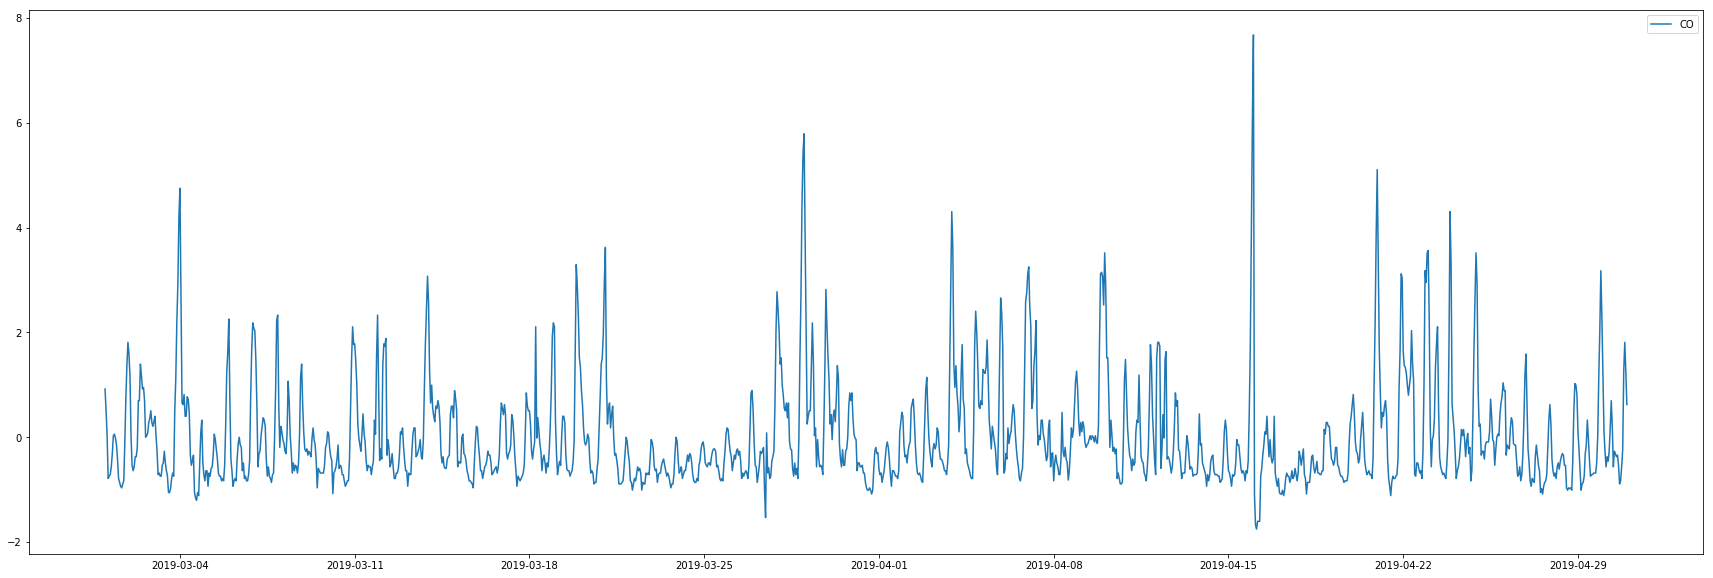

In [54]:
plt.figure(figsize=(30,10))
plt.plot(scaled_vasant_2019["CO"])
#plt.plot(scaled_vasant_2019["NO2"])
#plt.plot(scaled_vasant_2019["PM10"])
#plt.plot(scaled_vasant_2019["PM2.5"])
#plt.plot(scaled_vasant_2019["SO2"])
plt.legend()
plt.show()

In [56]:
scaled_vasant_2018.head()

,AT,BP,CO,NO,NO2,Ozone,PM10,PM2.5,RH,SO2,SR,WD,WS
timestamp,,,,,,,,,,,,,
2018-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
plt.figure(figsize=(30,10))
plt.plot(scaled_vasant_2018["CO"])
#plt.plot(scaled_vasant_2018["NO2"])
#plt.plot(scaled_vasant_2018["PM10"])
#plt.plot(scaled_vasant_2018["PM2.5"])
#plt.plot(scaled_vasant_2018["SO2"])
plt.legend()
plt.show()

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 2160x720 with 1 Axes>

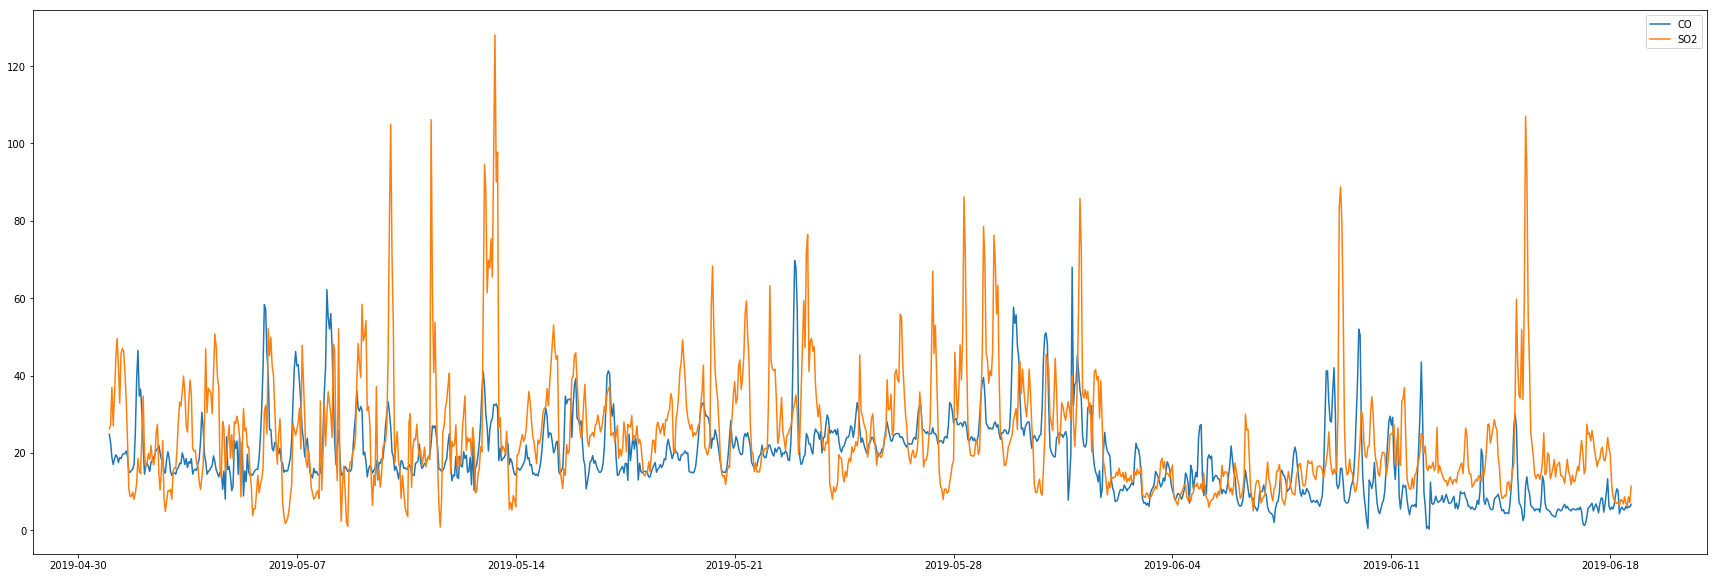

In [22]:
plt.figure(figsize=(30,10))
plt.plot(grishma_2019["CO"]*10)
#plt.plot(grishma_2019["NO2"])
#plt.plot(grishma_2019["PM10"])
#plt.plot(grishma_2019["PM2.5"])
plt.plot(grishma_2019["SO2"])
plt.legend()
plt.show()

In [10]:
grishma_2019[["CO", "NO2"]]
print(grishma_2019["NO2"].values.max())

238.6


In [11]:
grishma_2019[["CO" , "NO2"]]

,CO,NO2
timestamp,,
2019-05-01 00:00:00,2.48,132.82
2019-05-01 01:00:00,2.27,129.90
2019-05-01 02:00:00,1.88,74.40
2019-05-01 03:00:00,1.70,64.75
2019-05-01 04:00:00,1.85,73.17
2019-05-01 05:00:00,1.95,88.83
2019-05-01 06:00:00,1.90,80.20
2019-05-01 07:00:00,1.75,68.95
2019-05-01 08:00:00,1.88,78.65
